<div style="max-width:875px; text-align:center;">
    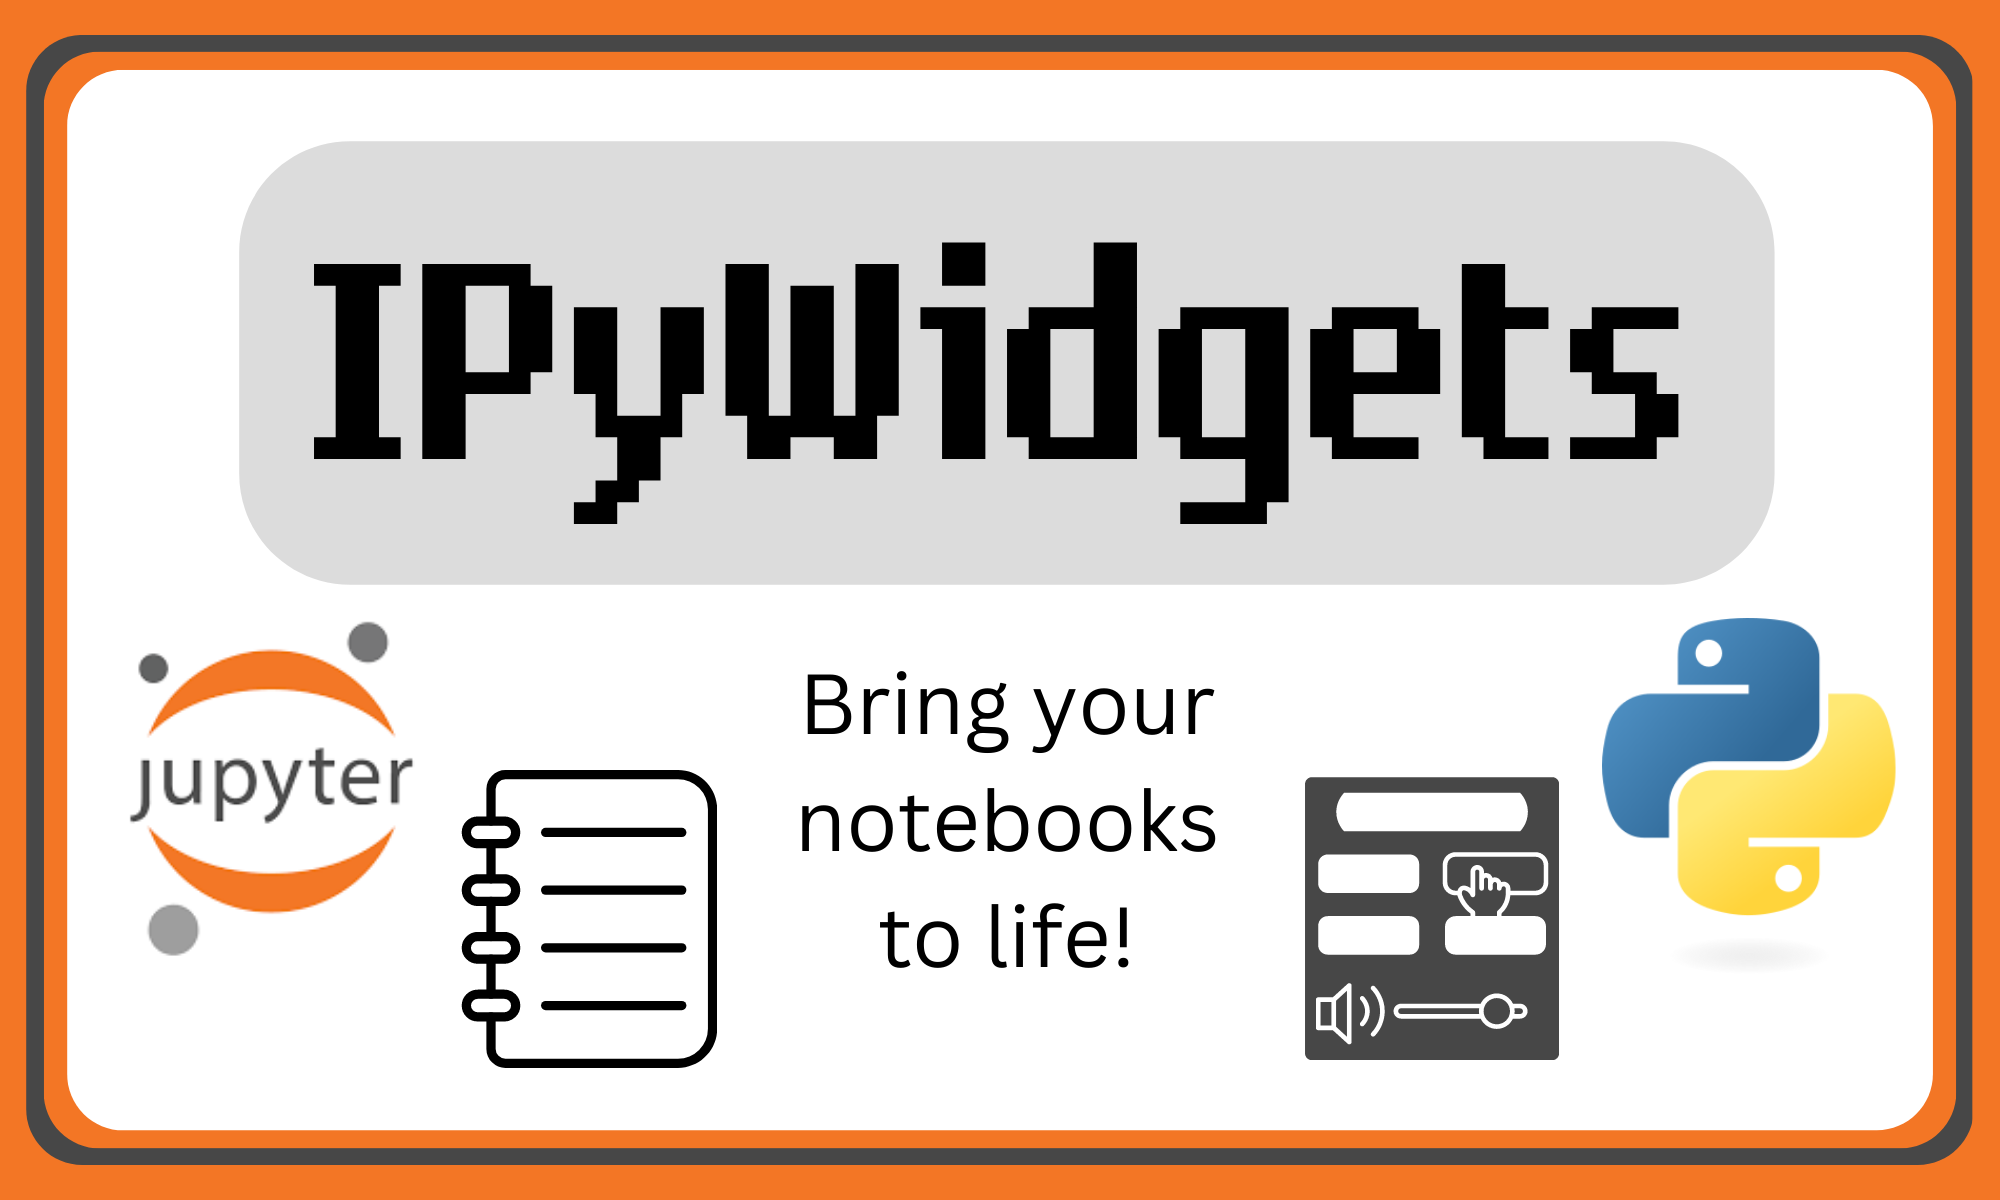
</div>

<!-- Reference:  https://stackoverflow.com/questions/57930004/jupyter-notebook-position-embedded-image-in-markdown --->

# Welcome to IPyWidgets!

This DTTD tutorial was created by the MSU D2L Instructor API Team for CMSE 495 Spring 2023.

IPyWidgets is a package for Python that allows you to bring interactivity to your Jupyter notebooks!

For further reading, the documentation can be found here. 
https://ipywidgets.readthedocs.io/en/stable/

### Importing IPyWidgets for Use in Jupyter Notebooks

IPyWidgets can be imported just like the most common Pyton Libraries that you may familiar with. Check out the cell below for the typical method to import the library. 

In [2]:
# importing the ipywidgets packages
# we will be able to use "widgets" to access it later in the notebook. 
import ipywidgets as widgets


#### Importing Other Libraries for the Tutorial

We will use a variety of other Python libraries to enhance the functionality of our widgets. These are imported in the cell below. 


In [3]:
# importing common Python libraries for Data Science 
import pandas as pd
import numpy as np

# importing the io package
# this will be helpful for our work with the 
import io

#### Using IPyWidgets with JupyterLite

To use widgets with JupyterLite, you will need to implement the following. 

(From: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)

In [4]:
# Imports for JupyterLite
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

import ipywidgets as widgets

#### Further Installation Instructions

Further installation instructions, including integration with JupyterLab, can be found here: https://ipywidgets.readthedocs.io/en/stable/user_install.html

## Types of Widgets

We will cover a variety of widgets in this tutorial. Specifically: Buttons, Sliders, and File Uploads.

Here's all of the widgets you can explore!

'Accordion',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'Checkbox',
 'ColorPicker',
 'Controller',
 'ControllerAxis',
 'ControllerButton',
 'DatePicker',
 'Dropdown',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'HBox',
 'HTML',
 'HTMLMath',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Label',
 'PlaceProxy',
 'Play',
 'Proxy',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'SelectionSlider',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'VBox',
 'Valid',
 'DirectionalLink',
 and 'Link.'

The full list of widgets with descriptions can also be found here:
https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

## Button

#### Very Basic Button

Here's the most simple version of the ipywidget button. You have to add an "on_click" action (see below) to add functionality to the button. 

In [5]:
# code to create and save button
basic_button = widgets.Button(
    description='Button Text') # text on button

# code to display button
display(basic_button)

Button(description='Button Text', style=ButtonStyle())

#### More Complex Button

Here's where the button becomes more useful. In the following code, we customize the look and feel of the button, as well as add a function associated with the button. 

In [6]:
button = widgets.Button(
    # text on button
    description='Button Text',
    disabled=False,
    # style
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    # button size
    layout=widgets.Layout(width='50%', height='100%'),
    # what is shown if you hover over the button with your cursor but don't click
    tooltip='Description Of What The Button Does',
    # little symbol on the button
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

# reference for these kind of nested functions below:
#https://github.com/jupyter-widgets/ipywidgets/issues/2103

# function to be associated with the button
def f(self):
    return_funct()
# NOTE: this function cannot take inputs: see application example below

# assigning our function to the click of the button
button.on_click(f)

In [7]:
display(basic_button)

Button(description='Button Text', style=ButtonStyle())

## Sliders

Sliders are great for allowing users to adjust input, and select values from a range. IPyWidgets has a variety of slider options, although they are primarily numeric. Below, we will cover how to create a basic float-vbased slider, but an integer-based slider can be created very similarly. 

In [62]:
# code to create the widget
slider_float = widgets.FloatSlider(
    value=8, # starting value of the slider
    min=0, # minimum value for slider
    max=15.0, # maximum value for the slider
    step=0.5, # value the slider can be moved by
    description='Try It!', # text accompanying slider
)

# code to display widget
display(slider_float)

FloatSlider(value=8.0, description='Try It!', max=15.0, step=0.5)

## File Upload

This widget is particularly useful for data science applications. No more hunting for the paths to your CSVs!

#### Basic File Upload

Here's the most simple version of the ipywidget file upload. This allows you to bring in a local file from your computer. 


In [8]:
# File upload widget
input_file_widget = widgets.FileUpload(
    # will only accept csv input
    accept='.csv',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    # description on button
    description='File Upload Text',
    # height and width of button
    layout=widgets.Layout(width='50%', height='100%'),
    multiple=True  # True to accept multiple files upload else False
)

# make the widget actually show up
display(input_file_widget)


FileUpload(value={}, accept='.csv', description='File Upload Text', layout=Layout(height='100%', width='50%'),…

#### Getting File Content

Setting up the file upload widget is fairly simple, but accessing the uploaded content can be a bit more difficult. The following example will walk through how to read in file content from a .csv as a .csv. 

In this example, we use the actual file content to read in the csv. You could also use the file name, which can be accessed similarly to the content, with read_csv, but this can get complicated with directories if you aren't careful. 

*Warning* this example will not run without a sample file uploaded above. You will get a list index out of range error.

In [9]:
# reference for accessing file contents
# https://stackoverflow.com/questions/67434906/ipywidgets-widgets-fileupload-updated-csv-file-read-the-csv-file

# Gets in to the nested dictionary that is returned by the .value call
input_file = list(input_file_widget.value.values())[0]
# now that we have the dictionary we want, we can access the item that holds the content
input_file_content = input_file['content']

IndexError: list index out of range

In [ ]:
# Creating our dataframe from the csv contents
# reference: https://stackoverflow.com/questions/67434906/ipywidgets-widgets-fileupload-updated-csv-file-read-the-csv-file

# have to use bytes io to parse
# reference for using BytesIO to do this:
# https://stackoverflow.com/questions/44888689/stringio-initial-value-must-be-str-not-bytes
# https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table

df = pd.read_csv(io.BytesIO(input_file_content), index_col=0)
df

## Styling and Layout

Now it's time to make our widgets visually appealing and engaging!

Style refers to visual characteristics not related to layout, like color. More information on style can be found here: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Styling.html

More information on "layout," which refers to positioning, size, etc, can be found here: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Layout.html


### Style

To get the style options for a widget you can use the command .style.keys. So for a  button titled 'button', it would be button.style.keys. 

You can change all kinds of attributes from colors to fonts, so make sure to explore when customizing widgets!

To set style, use the widget name, style, and the attribute, then set it equal to the value you'd like to set for that style attribute. You can also include it in the creation of the button using a style dictionary.

NOTE: some widgets (like buttons) even have style presets to explore like the "Danger Button" that will quickly customize multiple style attributes. 

See the code examples below. 

In [19]:
# Making a new button to experiment with
# here's an example of setting a style attribute in the creation of the button

basic_button2 = widgets.Button(style = dict(button_color = 'green')) # text on button

# code to display button
display(basic_button2)

Button(style=ButtonStyle(button_color='green'))

In [20]:
# changing the color of the button 
# This is an example of setting a style attribute after the creation of the button

basic_button2.style.button_color = 'blue'

In [21]:
# the DANGER button
# Here's an example of using the button style presets

danger_button = widgets.Button(description='Danger Button', button_style='danger')

# code to display button
display(danger_button)

Button(button_style='danger', description='Danger Button', style=ButtonStyle())

### Layout

Layout is crucial for sizing to make sure that your widgets are appropriate for the desired purpose. Customizing the layout can be as simple or as complex as you'd like! We'll keep it fairly simple in this tutorial with width and height, but you should know that there's more out there to consider. 

Layout attributes are typically set in the creation of the widget. You can use different units to do so. Setting a value with a % symbol requests that the widget use that percent of the availiable space. On the other hand, values set with 'px' denote that number of pixels. 

In the following example, we will create a button with a custom size. 

In [39]:
#code to create a button using 50% of availiable height space and 50 pixels in width
layout_button = widgets.Button(layout = widgets.Layout(height = '50%', width = '50px' ))

# code to display button
display(layout_button)

Button(layout=Layout(height='50%', width='50px'), style=ButtonStyle())

# Application Example

Data scientists often need to read in a .csv, manipulate it, and export it. This example walks through how you might use widgets to add interactivity to this application. 

*Warning* this example will not run without a sample csv file. You will get a list index out of range error.

In [47]:
# We need to define this function for use with widgets
def f(x):
    return x

In [48]:
# reference for layout 
# https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Layout.html

# Text input widget
# this is for inputting the new desired file name
file_name = widgets.Text(
    # what appears in the box initially
    value='Put Desired Name of Output Here Including ".csv" (Example.csv)',
    # what appears in the box when all text is deleted
    placeholder='Put Desired Name of Output Here',
    # what the box is labeled on the left
    description='New file name:',
    # width of secription
     style={'description_width': 'initial'},
    # text box size 
   layout=widgets.Layout(width='60%', height='80%'),
    disabled=False)

# make the widget actually show up
display(file_name)

Text(value='Put Desired Name of Output Here Including ".csv" (Example.csv)', description='New file name:', lay…

In [49]:
# saving widget input into usable variable
file_name_value = file_name.value
# this has to be in a different cell than the actual widget

In [50]:
# File upload widget
input_file_widget = widgets.FileUpload(
    # will only accept csv input
    accept='.csv',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    # description on button
    description='Upload File to be Converted:',
    # height and width of button
    layout=widgets.Layout(width='50%', height='100%'),
    multiple=True  # True to accept multiple files upload else False
)

# make the widget actually show up
display(input_file_widget)


FileUpload(value={}, accept='.csv', description='Upload File to be Converted:', layout=Layout(height='100%', w…

In [51]:
# reference for accessing file contents
# #https://stackoverflow.com/questions/67434906/ipywidgets-widgets-fileupload-updated-csv-file-read-the-csv-file

# Gets in to the nested dictionary that is returned by the .value call
input_file = list(input_file_widget.value.values())[0]
# now that we have the dictionary we want, we can access the item that holds the content
input_file_content = input_file['content']

IndexError: list index out of range

In [52]:
# Creating our dataframe from the csv contents
# reference: https://stackoverflow.com/questions/67434906/ipywidgets-widgets-fileupload-updated-csv-file-read-the-csv-file

# have to use bytes io to parse
# reference for using BytesIO to do this:
# https://stackoverflow.com/questions/44888689/stringio-initial-value-must-be-str-not-bytes
# https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table

df = pd.read_csv(io.BytesIO(input_file_content), index_col=0)
df

NameError: name 'input_file_content' is not defined

In [53]:
button = widgets.Button(
    # text on button
    description='Click to Convert and Download New File',
    disabled=False,
    # style
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    # button size
    layout=widgets.Layout(width='50%', height='100%'),
    # what is shown if you hover over the button with your cursor but don't click
    tooltip='Convert',
    # little symbol on the button
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

# reference for these kind of nested functions below:
#https://github.com/jupyter-widgets/ipywidgets/issues/2103

# function to be associated with the button
def return_funct(df, file_name_value):
    return df.to_csv(file_name_value)

# button can't really take input so we have to nest the functions like this
def f2(self):
    return_funct(df, file_name_value)

# assigning our function to the click of the button
button.on_click(f2)

In [ ]:
# click button that is displayed to download file
display(button)

## References



### Ipywidgets Documentation
https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Styling.html

https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Layout.html

### Functions for Widgets
https://github.com/jupyter-widgets/ipywidgets/issues/2103

### Reading File Content
https://stackoverflow.com/questions/67434906/ipywidgets-widgets-fileupload-updated-csv-file-read-the-csv-file

https://stackoverflow.com/questions/44888689/stringio-initial-value-must-be-str-not-bytes

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table
